In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Histograms

In [3]:
psi_sst = np.random.normal(25,10,10000)
psi_lmt = np.random.normal(10,5,10000)

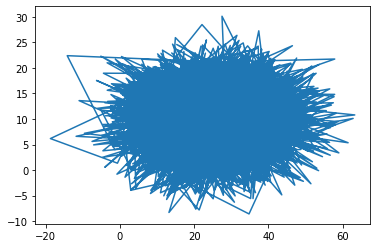

In [6]:
plt.plot(psi_sst,psi_lmt)

(array([   4.,   31.,  237., 1082., 2556., 3183., 2064.,  688.,  135.,
          20.]),
 array([-18.6979222 , -10.50145379,  -2.30498539,   5.89148302,
         14.08795142,  22.28441983,  30.48088823,  38.67735664,
         46.87382505,  55.07029345,  63.26676186]),
 <BarContainer object of 10 artists>)

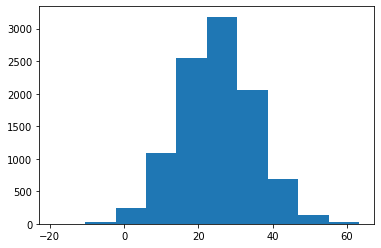

In [7]:
plt.hist(psi_sst)

(array([  15.,  138.,  635., 1928., 2933., 2599., 1332.,  373.,   43.,
           4.]),
 array([-8.60009979, -4.72652438, -0.85294897,  3.02062644,  6.89420185,
        10.76777726, 14.64135267, 18.51492808, 22.38850348, 26.26207889,
        30.1356543 ]),
 <BarContainer object of 10 artists>)

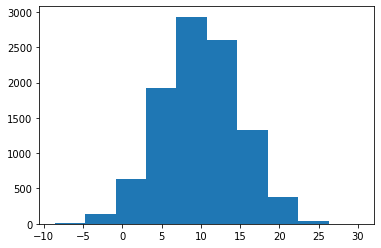

In [8]:
plt.hist(psi_lmt)

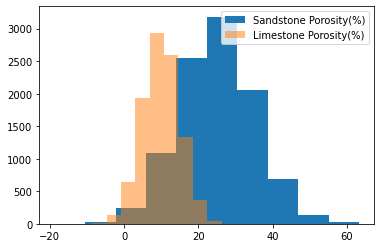

In [12]:
plt.hist(psi_sst, label = 'Sandstone Porosity(%)')
plt.hist(psi_lmt,alpha=0.5, label = 'Limestone Porosity(%)')
plt.legend()

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,
          1.,   0.,   1.,   1.,   2.,   3.,   7.,   6.,  10.,   8.,  10.,
         10.,  20.,  17.,  19.,  30.,  32.,  43.,  48.,  54.,  74.,  78.,
         78., 112., 105., 107., 127., 153., 194., 157., 199., 194., 215.,
        270., 275., 310., 307., 304., 325., 326., 290., 330., 327., 334.,
        317., 319., 323., 342., 275., 261., 296., 244., 228., 210., 200.,
        184., 164., 138., 139., 122., 109., 104.,  77.,  58.,  55.,  55.,
         54.,  25.,  29.,  38.,  25.,  16.,  12.,  11.,   7.,   9.,   8.,
          7.,   2.,   2.,   5.,   3.,   5.,   2.,   0.,   0.,   1.,   0.,
          2.]),
 array([-18.6979222 , -17.87827536, -17.05862852, -16.23898168,
        -15.41933484, -14.599688  , -13.78004116, -12.96039432,
        -12.14074748, -11.32110064, -10.50145379,  -9.68180695,
         -8.86216011,  -8.04251327,  -7.22286643,  -6.40321959,
         -5.58357275,  -4.76392591,  -3.94427907,  -3.12463223

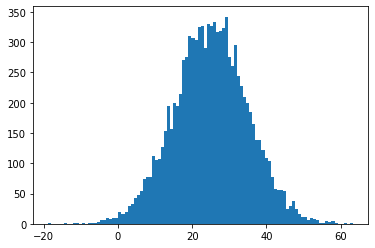

In [15]:
plt.hist(psi_sst, label = 'Sandstone Porosity(%)',bins=100)


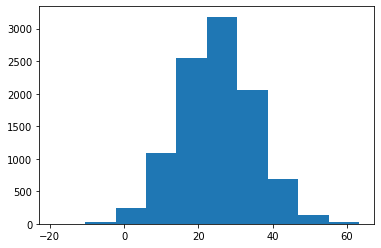

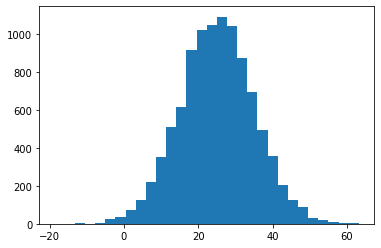

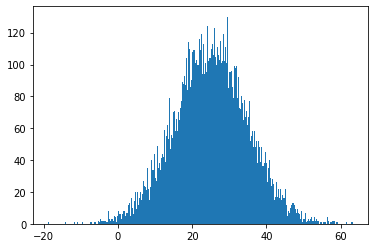

In [16]:
bins = [10,30,300]

for i in bins: 
    plt.hist(psi_sst,label="Sandstone",bins = i)
    plt.show()

##  Subplots:Multiple plots next to each other

(<Figure size 432x288 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

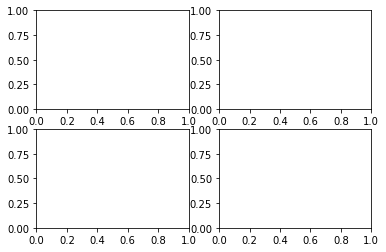

In [17]:
plt.subplots(nrows=2,ncols=2)

In [22]:
x_data = np.linspace(1,100,1000)

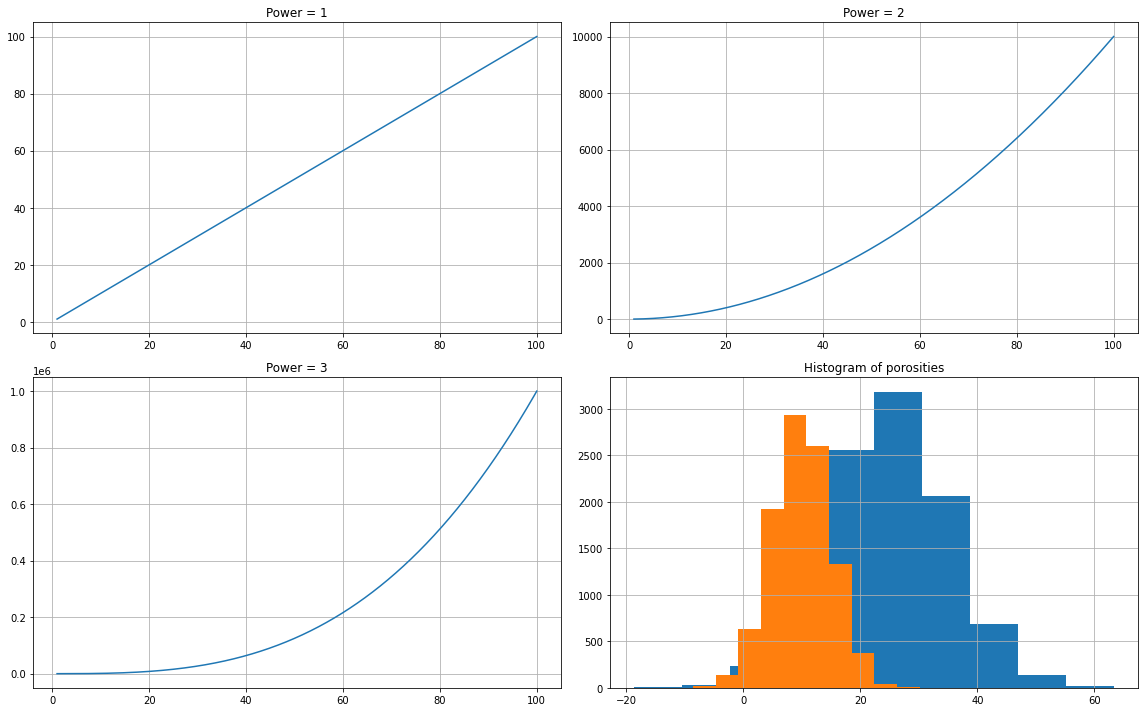

In [34]:
fig, axs = plt.subplots(nrows=2,ncols=2)

fig.set_figheight(10) ; fig.set_figwidth(16)

axs[0,0].plot(x_data,x_data**1,label="Power 1")
axs[0,0].set_title("Power = 1")
axs[0,0].grid()


axs[0,1].plot(x_data,x_data**2,label="Power 2")
axs[0,1].set_title("Power = 2")
axs[0,1].grid()

axs[1,0].plot(x_data,x_data**3,label="Power 3")
axs[1,0].set_title("Power = 3")
axs[1,0].grid()




axs[1,1].hist(psi_sst, label = 'Sandstone Porosity(%)')
axs[1,1].hist(psi_lmt, label = 'LMT Porosity(%)')
axs[1,1].set_title("Histogram of porosities")
axs[1,1].grid()

fig.tight_layout()

# Klinkenberg Effect

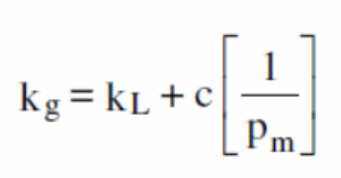

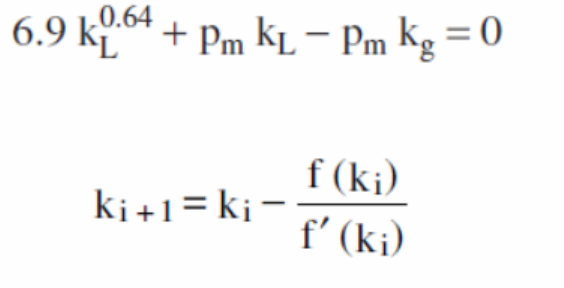

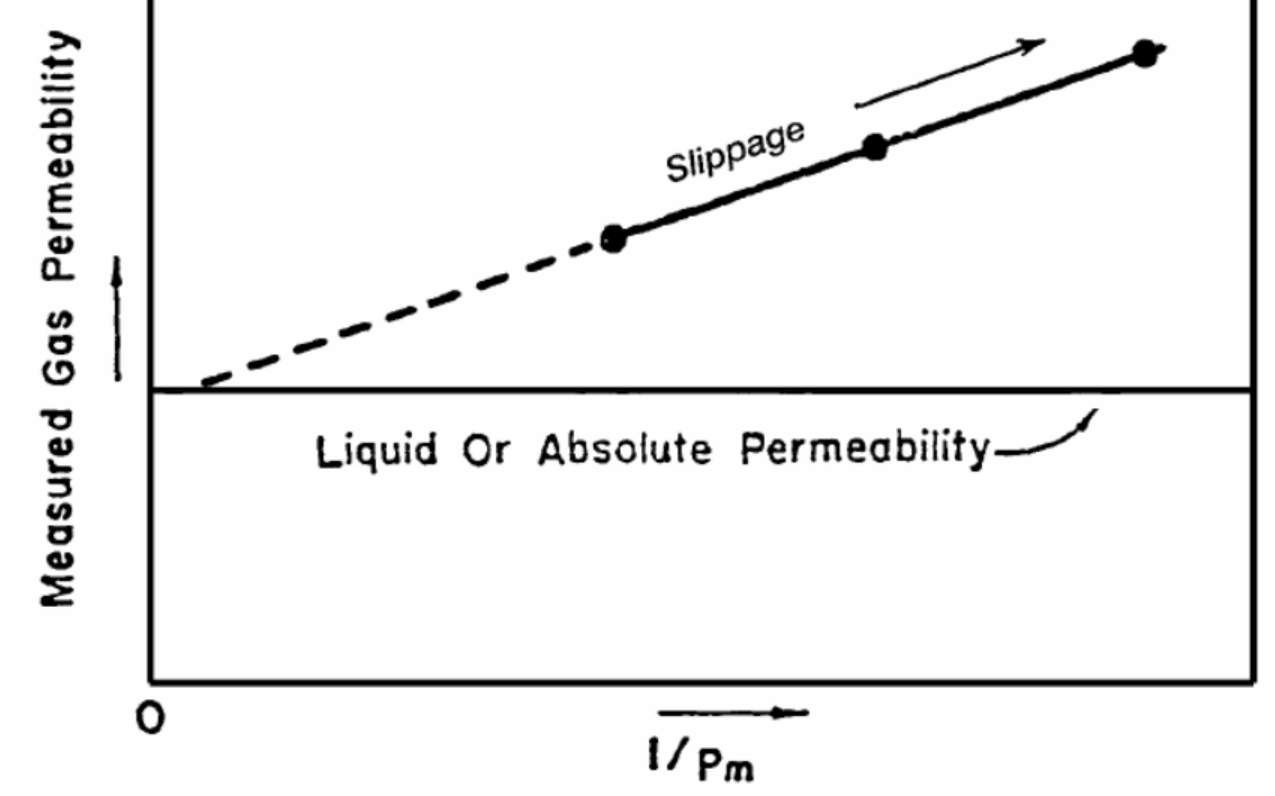

In [36]:
k = float(input('Enter the initisl guess of absolute Permeability(md): '))
pmean = float(input('Enter the mean pressure(psi): '))
kgas = float(input('Enter the gas perm. (md): '))

Enter the initisl guess of absolute Permeability(md): 200
Enter the mean pressure(psi): 3
Enter the gas perm. (md): 47


In [37]:
while abs(6.9*(k**0.64)+pmean*k-pmean*kgas) >0.0001:
    k = k - (6.9*(k**0.64)+pmean*k - pmean*kgas)/(4.416*(k**(-0.36))+pmean)

In [38]:
print("The value of absolute permeability after iteration or gas permeability at infinite pmean is ",k)


The value of absolute permeability after iteration or gas permeability at infinite pmean is  27.719739772927824


In [39]:
x = [0,1/pmean]
y = [k,kgas]

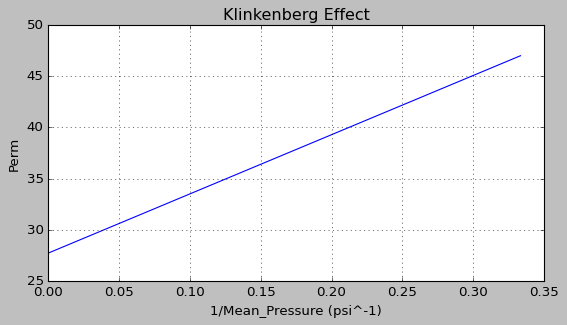

In [40]:
plt.style.use('classic')

plt.figure(figsize=(8,4))

plt.plot(x,y)

plt.xlabel('1/Mean_Pressure (psi^-1)')

plt.ylabel('Perm')

plt.title('Klinkenberg Effect')

plt.grid(True)

In [41]:
x,y

([0, 0.3333333333333333], [27.719739772927824, 47.0])

In [47]:
coefficients = np.polyfit(x,y,1)

In [46]:
x_axis = np.linspace(0,0.5,200)

In [48]:
y_axis = coefficients[0]*x_axis + coefficients[1]

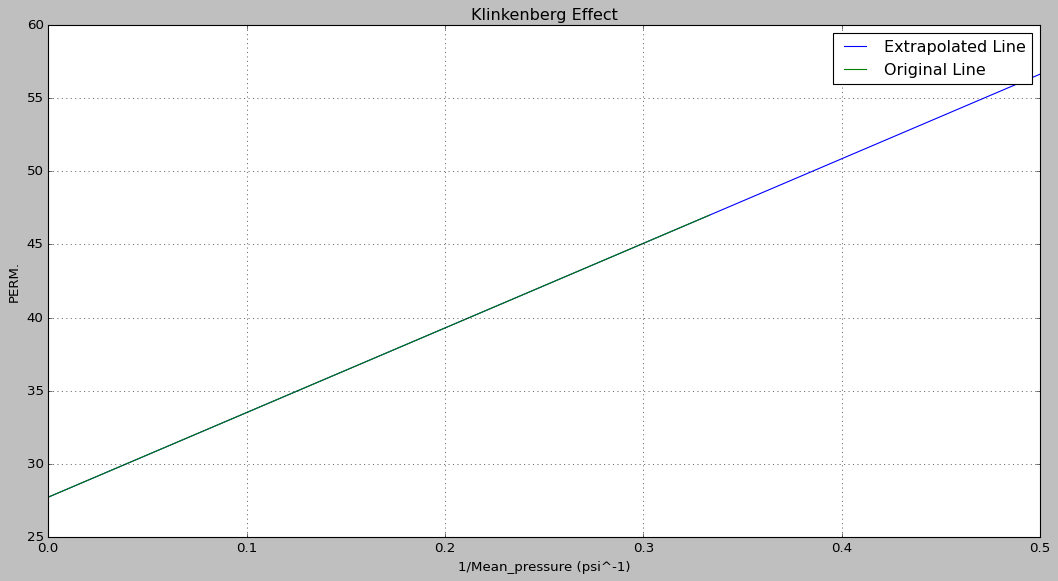

In [52]:
plt.figure(figsize=(16,8))
plt.plot(x_axis,y_axis,label = 'Extrapolated Line')
plt.plot(x,y,label = 'Original Line')

plt.xlabel('1/Mean_pressure (psi^-1)')
plt.ylabel('PERM.')
plt.title('Klinkenberg Effect')
plt.grid(True)
plt.legend()


In [66]:
def klinkenberg():
    #Take input from user
    k = float(input('Enter the initisl guess of absolute Permeability(md): '))
    pmean = float(input('Enter the mean pressure(psi): '))
    kgas = float(input('Enter the gas perm. (md): '))
    
    #pmean_for_new_perm = float(input('Enter the mean pressure(psi) at which permeability need to be found: '))
    
    # Find Kl
    while abs(6.9*(k**0.64)+pmean*k-pmean*kgas) >0.0001:
        k = k - (6.9*(k**0.64)+pmean*k - pmean*kgas)/(4.416*(k**(-0.36))+pmean)
    
    print("The value of absolute permeability after iteration or gas permeability at infinite pmean is ",k)
    
    # GIVEN DATA POIUNTS
    x = [0,1/pmean]
    y = [k,kgas]
    
    # Extrapolated Data
    
    coefficients = np.polyfit(x,y,1)
    x_axis = np.linspace(0,0.5,200)
    y_axis = coefficients[0]*x_axis + coefficients[1]
    
    #Final plot
    
    plt.figure(figsize=(16,8))
    plt.plot(x_axis,y_axis,label = 'Extrapolated Line')
    plt.plot(x,y,label = 'Original Line')
    
    #plt.scatter(0.3,24,label = 'scatter',s = 100,c='red',marker= "+")
    plt.xlabel('1/Mean_pressure (psi^-1)')
    plt.ylabel('PERM.')
    plt.title('Klinkenberg Effect')
    plt.grid(True)
    plt.legend()
    
    return k


Enter the initisl guess of absolute Permeability(md): 200
Enter the mean pressure(psi): 5
Enter the gas perm. (md): 20
The value of absolute permeability after iteration or gas permeability at infinite pmean is  12.90727396710933


12.90727396710933

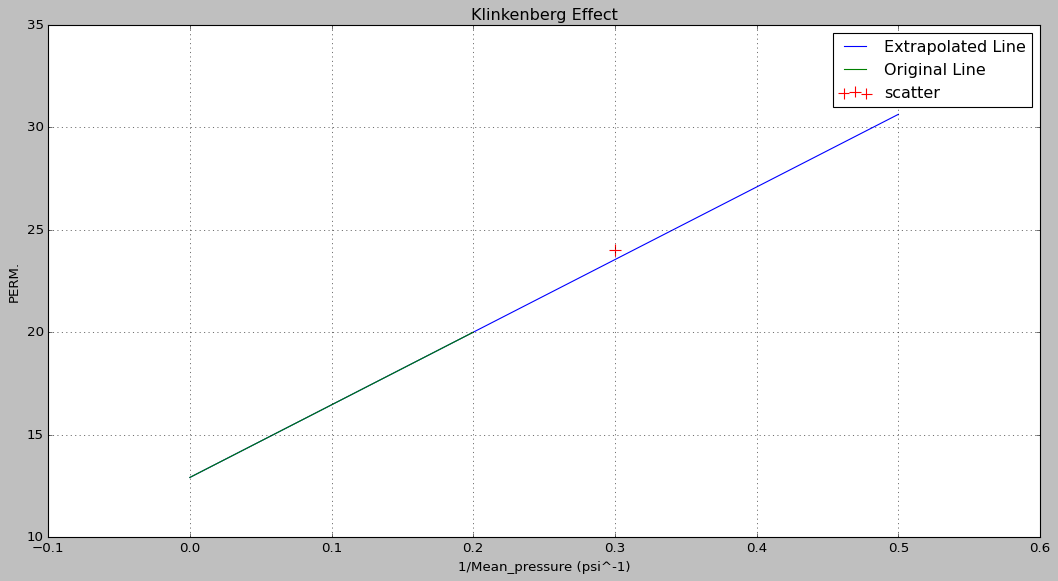

In [67]:
klinkenberg()

## Home Assignment 1

#### Add functionality, user will provide input of mean pressure, calculate the gas permeability at given pmean, and also plot that scatter in this figure

## Pressure Profiling Reservoir

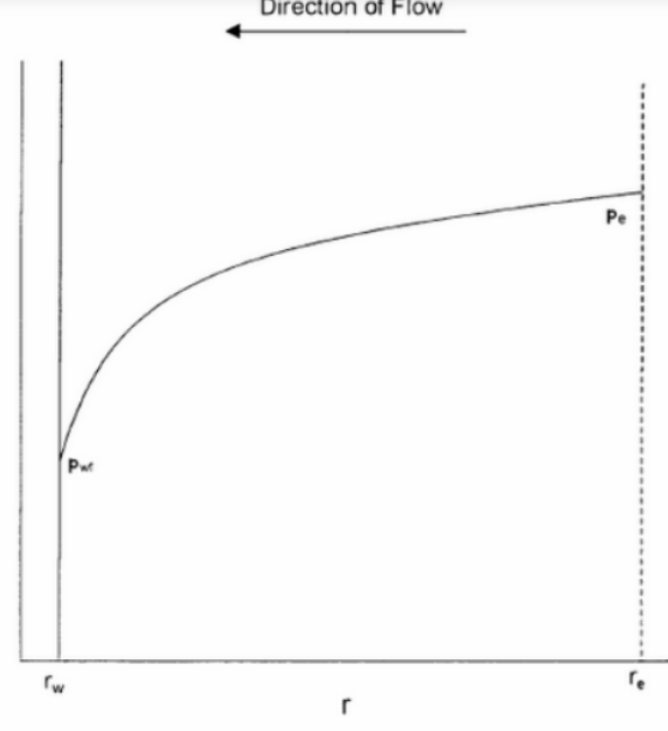

In [68]:
re = float(input('Outer radius of Reservoir(ft): '))
rw = float(input('Wellbore Radius(ft): '))
Pwf = float(input('Bottomhole Pressure(PSI): '))
h = float(input('Net Pay Thickness(ft): '))
k = float(input('Average Reservoir Permeability(mD): '))
q = float(input('Flowrate(STB/Day): '))
mu = float(input('Oil Viscosity: '))
B = 1

Outer radius of Reservoir(ft): 1800
Wellbore Radius(ft): 0.5
Bottomhole Pressure(PSI): 1500
Net Pay Thickness(ft): 60
Average Reservoir Permeability(mD): 150
Flowrate(STB/Day): 200
Oil Viscosity: 15


In [69]:
r = np.linspace(rw,re,500)

P(at any r) = Pwf+(141.2*q*mu*B*log(r/rw))/(k*h))

In [71]:
pressure = Pwf+(141.2*q*mu*B*(np.log(r/rw))/(k*h))

In [72]:
pressure

array([1500.        , 1599.1058435 , 1628.77345047, 1646.8290728 ,
       1659.84662581, 1670.03283001, 1678.40196398, 1685.50521086,
       1691.67568109, 1697.13015983, 1702.01766534, 1706.44504746,
       1710.49153529, 1714.21750647, 1717.67003078, 1720.88651482,
       1723.89717846, 1726.72678561, 1729.39588333, 1731.92170804,
       1734.31886066, 1736.59981793, 1738.7753255 , 1740.85470403,
       1742.84609053, 1744.75663067, 1746.59263356, 1748.35969743,
       1750.06281255, 1751.70644625, 1753.29461349, 1754.83093595,
       1756.31869179, 1757.76085773, 1759.16014498, 1760.51902982,
       1761.83978006, 1763.12447776, 1764.37503898, 1765.59323099,
       1766.78068726, 1767.93892067, 1769.06933507, 1770.17323552,
       1771.25183733, 1772.30627413, 1773.33760504, 1774.34682101,
       1775.33485059, 1776.30256505, 1777.250783  , 1778.18027454,
       1779.09176502, 1779.98593846, 1780.8634406 , 1781.72488174,
       1782.57083926, 1783.40185994, 1784.21846213, 1785.02113

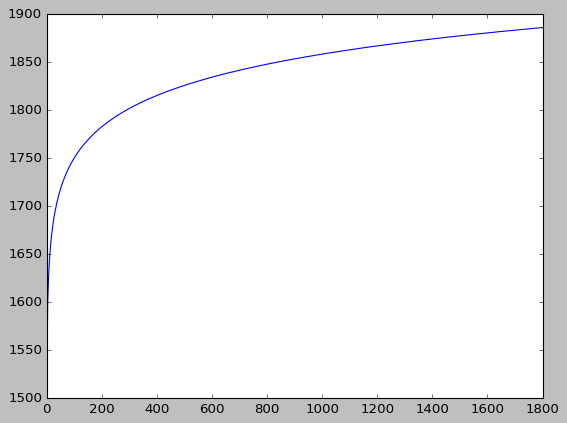

In [74]:
plt.plot(r,pressure)

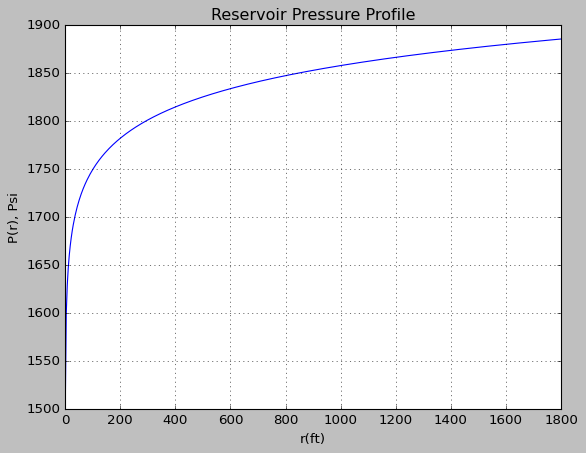

In [75]:
plt.figure(figsize = [8,6])
plt.plot(r,pressure)
plt.xlabel('r(ft)')
plt.ylabel('P(r), Psi')
plt.title('Reservoir Pressure Profile')
plt.grid(True)